In [151]:
from sympy.solvers import solve
from sympy import Symbol
import math
import numpy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [181]:
from sympy import tanh

MR = 80 #mm
f = 16 #mm
T_deg = 30 #deg
T = math.radians(T_deg)
Opt_Center = 160 #mm


x1 = Symbol('x1')
y1 = Symbol('y1')
x2 = Symbol('x2')
y2 = Symbol('y2')


eq1 = ( (x2 - x1)**2 + (y2 - y1)**2 )**.5 - MR
eq2 = tanh(y1/x1) -tanh(y2/x2)
eq3 = tanh((y1+y2)/(x1+x2)) - T
eq4 = tanh(-y1/(Opt_Center - x1)) - T

answer = nsolve((eq1, eq2, eq3, eq4), (x1, y1, x2, y2), (Opt_Center-MR/4, -MR/2,Opt_Center+MR/2,MR/4))
answer
pt1 = [float(answer[0]),float(answer[1])]
pt2 = [float(answer[2]),float(answer[3])]
assert distance(pt1,pt2) ==80

pt1 = np.array(pt1)
pt2 = np.array(pt2)
Target_v = pt2 - pt1
anngle_of_target = math.degrees(angle(Target, [1,0]))
anngle_of_target = round(anngle_of_target,6)
assert T_deg == anngle_of_target


#Optical_Center = [160,0,0]

#point = ThinLens(f,Optical_Center)
#point

#Far = [205.27,18.29,0]
#point = ThinLens(f,Far)



ValueError: Could not find root within given tolerance. (8.69854e-06 > 2.1684e-19)
Try another starting point or tweak arguments.

In [178]:
pt2

array([ 149.16389066,   86.70673393])

In [165]:
pts = [pt1,pt2]
x = []
y = []
N= len(pts)

for point in pts:
    x.append(point[0])
    y.append(point[1])
    
#colors = np.random.rand(N)
#area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii



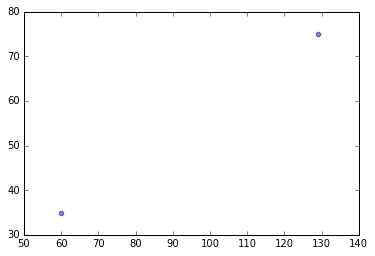

In [166]:
plt.scatter(x, y, alpha=0.5)
plt.show()

In [60]:
def ThinLens(EFL, Point):
    #f = Symbol('f')
    di = Symbol('di')
    #do = Symbol('do')
    Point_i = []
    
    do = Point[0]
    f = EFL
    
    eq = (1/di+1/do)-1/f
    di=solve(eq)
    assert len(di) == 1
    di = di[0]
    
    Point_i.append(di)
    
    Mag = di/do
    
    Point_i.append(Point[1]*Mag)
    Point_i.append(Point[2]*Mag)
    
    
    return Point_i

test1 = ThinLens(16,[100,0,0])
assert round(test1[0],6) == 19.047619




def distance(pt1,pt2):
    x1 = pt1[0]
    x2 = pt2[0]
    y1 = pt1[1]
    y2 = pt2[1]
       
    dist = math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
    return dist

assert distance([0,0],[0,1]) ==1

In [53]:
from visual import *
redbox=box(pos=vector(4,2,3),
           size=(8,4,6),color=color.red)
ball=sphere(pos=vector(4,7,3),radius=2,color=color.green)

ImportError: No module named 'visual'

Looks promising http://vpython.org/contents/docs/VisualIntro.html
#http://docs.sympy.org/dev/modules/solvers/solvers.html

In [56]:

# http://docs.sympy.org/dev/modules/solvers/solvers.html


from sympy import Symbol, nsolve
import sympy
import mpmath
mpmath.mp.dps = 15
x1 = Symbol('x1')
x2 = Symbol('x2')
f1 = 3 * x1**2 - 2 * x2**2 - 1
f2 = x1**2 - 2 * x1 + x2**2 + 2 * x2 - 8
print(nsolve((f1, f2), (x1, x2), (-1, 1)))


[-1.19287309935246]
[ 1.27844411169911]


In [86]:
import math
#http://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python

def dotproduct(v1, v2):
  return sum((a*b) for a, b in zip(v1, v2))

def length(v):
  return math.sqrt(dotproduct(v, v))

def angle(v1, v2):
  return math.acos(dotproduct(v1, v2) / (length(v1) * length(v2)))